In [31]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
ground_energy = -7.784460280031223

In [46]:
f = h5py.File("data/lih_h.hdf5", "r")
h_h = f["h"][:, :]
s_h = f["s"][:, :]
ds_h = f["ds"][:]
energies_h = f["energies"][:]
num_kept_h = f["num_kept"][:]
f.close()

In [47]:
f = h5py.File("data/lih_u.hdf5", "r")
h_u = f["h"][:, :]
s_u = f["s"][:, :]
ds_u = f["ds"][:]
energies_u = f["energies"][:]
num_kept_u = f["num_kept"][:]
f.close()

In [48]:
f = h5py.File("data/lih_toeplitz.hdf5", "r")
h_toeplitz = f["h"][:, :]
s_toeplitz = f["s"][:, :]
ds_toeplitz = f["ds"][:]
energies_toeplitz = f["energies"][:]
num_kept_toeplitz = f["num_kept"][:]
f.close()

In [68]:
f = h5py.File("data/lih_tebd.hdf5", "r")
h_tebd = f["h"][:, :]
s_tebd = f["s"][:, :]
ds_tebd = f["ds"][:]
energies_tebd = f["energies"][:]
num_kept_tebd = f["num_kept"][:]
f.close()

In [70]:
errs_h = np.abs(energies_h - ground_energy)
errs_u = np.abs(energies_u - ground_energy)
errs_toeplitz = np.abs(energies_toeplitz - ground_energy)
errs_tebd = np.abs(energies_tebd - ground_energy)

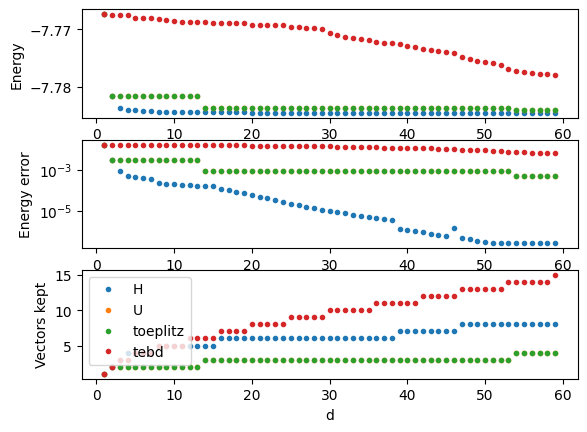

In [72]:
fig, ax = plt.subplots(3, 1)
ax[0].plot(ds_h, energies_h, '.', label="H")
ax[0].plot(ds_u, energies_u, '.', label="U")
ax[0].plot(ds_toeplitz, energies_toeplitz, '.', label="toeplitz")
ax[0].plot(ds_tebd, energies_tebd, '.', label="TEBD")
ax[0].set_ylabel("Energy")

ax[1].plot(ds_h, errs_h, '.', label="H")
ax[1].plot(ds_u, errs_u, '.', label="U")
ax[1].plot(ds_toeplitz, errs_toeplitz, '.', label="toeplitz")
ax[1].plot(ds_tebd, errs_tebd, '.', label="tebd")
ax[1].set_yscale("log")
ax[1].set_ylabel("Energy error")

ax[2].plot(ds_h, num_kept_h, '.', label="H")
ax[2].plot(ds_u, num_kept_u, '.', label="U")
ax[2].plot(ds_toeplitz, num_kept_toeplitz, '.', label="toeplitz")
ax[2].plot(ds_tebd, num_kept_tebd, '.', label="tebd")
ax[2].set_ylabel("Vectors kept")
ax[2].set_xlabel("d")

plt.legend()

In [73]:
overlaps_h = np.abs(1 - np.abs(s_h[:-1, 0]) ** 2)
overlaps_u = np.abs(1 - np.abs(s_u[:-1, 0]) ** 2)
overlaps_toeplitz = np.abs(1 - np.abs(s_toeplitz[:-1, 0]) ** 2)
overlaps_tebd = np.abs(1 - np.abs(s_tebd[:-1, 0]) ** 2)

diag_energy_h = np.abs(np.diag(h_h)[:-1] - h_h[0, 0])
diag_energy_u = np.abs(np.diag(h_u)[:-1] - h_u[0, 0])
diag_energy_toeplitz = np.abs(np.diag(h_toeplitz)[:-1] - h_toeplitz[0, 0])
diag_energy_tebd = np.abs(np.diag(h_tebd)[:-1] - h_tebd[0, 0])

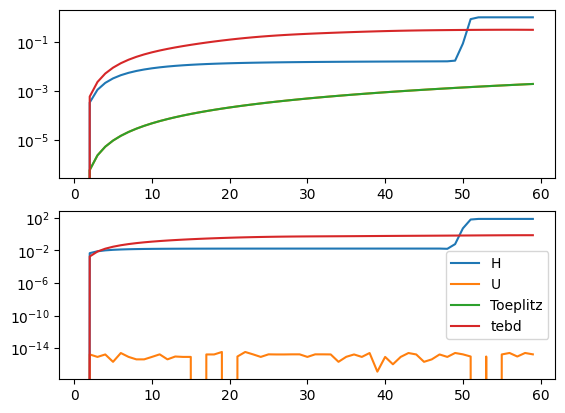

In [75]:
fig2, ax2 = plt.subplots(2, 1)
ax2[0].plot(ds_h, overlaps_h, label="H")
ax2[0].plot(ds_u, overlaps_u, label="U")
ax2[0].plot(ds_toeplitz, overlaps_toeplitz, label="Toeplitz")
ax2[0].plot(ds_tebd, overlaps_tebd, label="tebd")
ax2[0].set_yscale("log")

ax2[1].plot(ds_h, diag_energy_h, label="H")
ax2[1].plot(ds_u, diag_energy_u, label="U")
ax2[1].plot(ds_toeplitz, diag_energy_toeplitz, label="Toeplitz")
ax2[1].plot(ds_tebd, diag_energy_tebd, label="tebd")
ax2[1].set_yscale("log")

plt.legend()